# Importar dados

In [1]:
import pandas as pd
train_data = pd.read_csv(r'../data/train.csv')
test_data = pd.read_csv(r'../data/test.csv')

In [2]:
train_data.shape

(112, 4)

# Analisar Dados

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         112 non-null    int64
 1   age        112 non-null    int64
 2   sex        112 non-null    int64
 3   education  112 non-null    int64
dtypes: int64(4)
memory usage: 3.6 KB


In [4]:
train_data.describe()

,id,age,sex,education
count,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714
std,32.475632,22.642156,0.501927,4.909870
min,1.000000,13.000000,0.000000,0.000000
25%,28.750000,20.000000,0.000000,4.000000
50%,56.500000,51.500000,0.000000,9.000000
75%,84.250000,65.250000,1.000000,12.000000
max,112.000000,79.000000,1.000000,20.000000


In [5]:
#fig = plt.figure(figsize = (20,5))
#ax = fig.gca()
#train_data['education'].hist(ax = ax)
train_data.head()

,id,age,sex,education
0,1,13,1,7
1,2,14,0,8
2,3,15,1,9
3,4,15,1,9
4,5,15,1,9


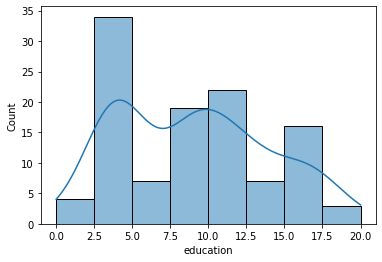

In [6]:
#train_data.isna().any()

import seaborn as sns
#sns.histplot(train_data['age'], kde='True')
#sns.histplot(train_data['sex'], kde='True')
sns.histplot(train_data['education'], kde='True')

#sns.boxplot(x=train_data['age'])
#sns.boxplot(x=train_data['sex'])
#sns.boxplot(x=train_data['education'])

import matplotlib.pyplot as plt
#corr_matrix = train_data.corr()
#f, ax = plt.subplots(figsize=(8,6))
#sns.heatmap(corr_matrix, vmin=1, vmax=1, square=True, annot=True)

# Tratar Dados

In [ ]:
education_train = []
for ar in zip(train_data['education']):
    age = ar[0]
    if age > 16:
        education_train.append('Muito Alta')
    elif age > 12: 
        education_train.append('Alta')
    elif age > 8: 
        education_train.append('Normal')
    elif age > 4:
        education_train.append('Baixa')
    else:
        education_train.append('Muito Baixa')

education_test = []
for ar in zip(test_data['education']):
    age = ar[0]
    if age > 16:
        education_test.append('Muito Alta')
    elif age > 12: 
        education_test.append('Alta')
    elif age > 8: 
        education_test.append('Normal')
    elif age > 4:
        education_test.append('Baixa')
    else:
        education_test.append('Muito Baixa')

train_data['education'] = education_train
test_data['education'] = education_test

In [8]:
train_data.head()

,id,age,sex,education
0,1,13,1,Baixa
1,2,14,0,Baixa
2,3,15,1,Normal
3,4,15,1,Normal
4,5,15,1,Normal


# Visualisar os dados

In [7]:
import numpy as np
import scipy.io

mat = scipy.io.loadmat('../data/train_data.mat')

X = mat["train_data"]
print(X)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.02631835 0.01242944 0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.01770987 0.         0.        ]]

 [[0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  [0.         0.      

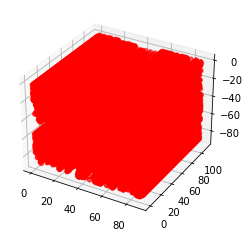

In [8]:
#todos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z,x,y = X.nonzero()
            
ax.scatter(x, y, -z, zdir='z', c= 'red')
plt.show()

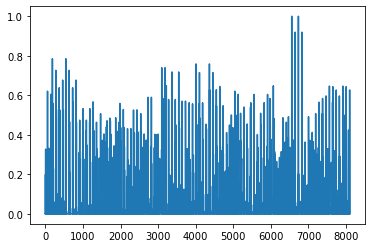

In [9]:
#Exemplo 1 pessoa
store = []
for i in range(90):
    for j in range (90):
        store.append(X[i][j][15])
        #print(X[i][j][0])
        
plt.plot(store)

# Importar matrizes de conectividade

In [10]:
def get_data_from_mat(train_file,test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 
    print(train_mat.keys())
    print(test_mat.keys())
    train_np = np.array(train_mat['train_data']).transpose(2,0,1)
    test_np = np.array(test_mat['test_data']).transpose(2,0,1)
    print(train_np.shape)
    print(test_np.shape)
    return  train_np, test_np


train_mat, test_mat = get_data_from_mat('../data/train_data.mat','../data/test_data.mat')

dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
(112, 90, 90)
(28, 90, 90)


# Treinar o modelo 1 - Utilizar os dados das matrizes e apenas as labels do csv


In [11]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2022-05-02 21:53:33.885780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-02 21:53:33.885960: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10465916057987600549
xla_global_id: -1
]


2022-05-02 21:53:37.875774: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-02 21:53:37.878898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-02 21:53:37.878930: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-02 21:53:37.878959: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (benjamim-ThinkPad-X260): /proc/driver/nvidia/version does not exist


In [14]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Embedding, BatchNormalization,Activation,Dropout, Input, concatenate
from livelossplot.inputs.tf_keras import PlotLossesCallback
from tensorflow.keras.initializers import RandomNormal, Constant

y_train = train_data['age']
x_train = train_mat
x_train2 = train_data.drop('age',axis=1)
x_train = tf.expand_dims(x_train, axis=-1)



inputs = Input(shape=(90,90,1))

conv1 = Conv2D(128, (3, 3))(inputs)
norm1 = BatchNormalization(momentum=0.99) (conv1)
act1 = Activation('relu') (norm1)
pool1 = MaxPooling2D((2, 2)) (act1)

conv2 = Conv2D(256, (3, 3))(pool1)
norm2 = BatchNormalization(momentum=0.99) (conv2)
act2 = Activation('relu') (norm2)
pool2 = MaxPooling2D((2, 2)) (act2)

conv3 = Conv2D(256, (3, 3))(pool2)
norm3 = BatchNormalization(momentum=0.99) (conv3)
act3 = Activation('relu') (norm3)

inputs2 = Input(shape = (3))

flat2 = Flatten()(inputs2)


flat = Flatten()(act3)

concat = concatenate([flat, flat2])

dense1 = Dense(256, activation='relu')(concat)
drop = Dropout(0.2) (dense1)
dense2 = Dense(256, activation='relu') (drop)
dense3 = Dense(100, activation='relu') (dense2)
output = Dense(1, activation='relu') (dense3)

model = Model([inputs,inputs2], output)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 90, 90, 1)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 88, 88, 128)  1280        ['input_5[0][0]']                
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 88, 88, 128)  512        ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_6 (Activation)      (None, 88, 88, 128)  0           ['batch_normalization_6[0][

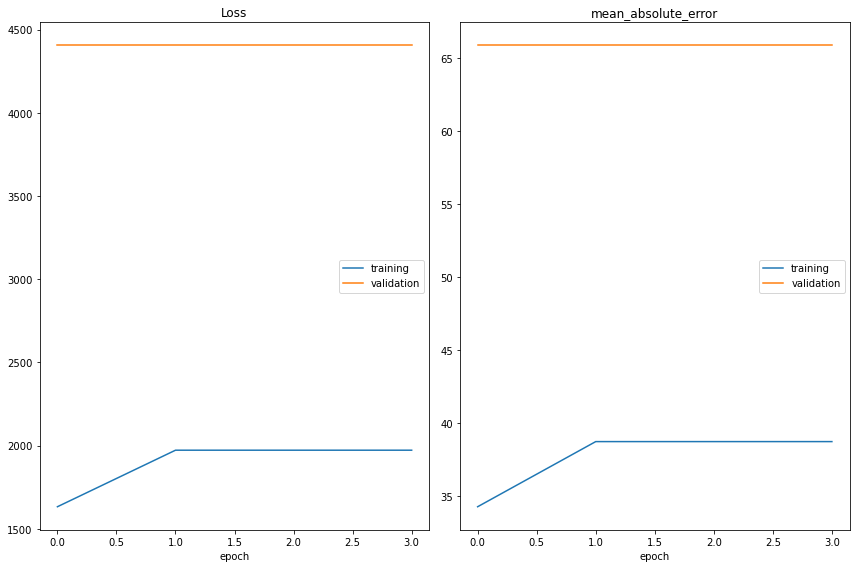

Loss
	training         	 (min: 1632.331, max: 1972.135, cur: 1972.135)
	validation       	 (min: 4404.739, max: 4404.739, cur: 4404.739)
mean_absolute_error
	training         	 (min:   34.281, max:   38.742, cur:   38.742)
	validation       	 (min:   65.870, max:   65.870, cur:   65.870)
2/2 [==============================] - 11s 4s/step - loss: 1972.1349 - mean_absolute_error: 38.7416 - val_loss: 4404.7393 - val_mean_absolute_error: 65.8696
Epoch 5/120


KeyboardInterrupt: 

In [15]:

model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_error')





history = model.fit([x_train,x_train2], y_train, epochs=120, batch_size=64, validation_split=0.2, callbacks=[PlotLossesCallback()])

# Aplicar o modelo às matrizes de treino

In [29]:
print("Evaluate")
train_mat = tf.expand_dims(train_mat, axis=-1)
result = model.predict(train_mat)
print(result)

Evaluate
[[31.588097]
 [33.403873]
 [29.40556 ]
 [33.36061 ]
 [40.820564]
 [40.50888 ]
 [45.711433]
 [36.02922 ]
 [40.261803]
 [44.93267 ]
 [35.514107]
 [38.161774]
 [32.138496]
 [44.524666]
 [31.11131 ]
 [35.059452]
 [34.58259 ]
 [38.96711 ]
 [47.22876 ]
 [27.03593 ]
 [36.5607  ]
 [37.19805 ]
 [38.239525]
 [34.89053 ]
 [47.899155]
 [40.322098]
 [52.173916]
 [39.422955]
 [63.34928 ]
 [45.335014]
 [56.754776]
 [50.848885]
 [43.922966]
 [44.11118 ]
 [49.672462]
 [35.2194  ]
 [41.242077]
 [44.62493 ]
 [42.899414]
 [47.886547]
 [49.01091 ]
 [41.65429 ]
 [39.29672 ]
 [56.741287]
 [49.199326]
 [51.8636  ]
 [39.706444]
 [49.142647]
 [54.722855]
 [31.698671]
 [41.142723]
 [44.930714]
 [48.689575]
 [40.720936]
 [39.45237 ]
 [66.03219 ]
 [64.99362 ]
 [71.20044 ]
 [55.921936]
 [70.6135  ]
 [66.22607 ]
 [54.695053]
 [60.395477]
 [66.34612 ]
 [64.33512 ]
 [69.16504 ]
 [62.2079  ]
 [68.682076]
 [61.033176]
 [69.70609 ]
 [65.63749 ]
 [68.123055]
 [69.78144 ]
 [57.703964]
 [64.29283 ]
 [73.751274]
 [6

# Treinar o modelo 2 - com os dados todos do csv mais os resultados do primeiro treino

In [30]:
result = pd.DataFrame(result,columns=['RMage'])
train_data['RMage']=result



In [31]:
train_data.shape

(112, 5)

In [33]:
train_data.describe()

,id,age,sex,education,RMage
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714,54.303852
std,32.475632,22.642156,0.501927,4.909870,13.991942
min,1.000000,13.000000,0.000000,0.000000,27.035931
25%,28.750000,20.000000,0.000000,4.000000,41.062183
50%,56.500000,51.500000,0.000000,9.000000,55.758667
75%,84.250000,65.250000,1.000000,12.000000,66.602699
max,112.000000,79.000000,1.000000,20.000000,78.096642


In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         112 non-null    int64  
 1   age        112 non-null    int64  
 2   sex        112 non-null    int64  
 3   education  112 non-null    int64  
 4   RMage      112 non-null    float32
dtypes: float32(1), int64(4)
memory usage: 4.1 KB


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, SimpleRNN, Dense, Dropout

model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(3,)))
model.add(BatchNormalization(momentum=0.3))
model2.add(Dense(256, activation='relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='relu'))

model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_50 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_51 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_52 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_53 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_54 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_55 (Dense)             (None, 1)               

In [45]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_percentage_error')


x_train = train_data.drop(['age','id'],axis=1)
y_train = train_data['age']


#mean normalization
#x_train=(x_train-x_train.mean())/x_train.std()

#max min normalization
#x_train=(x_train-x_train.min())/(x_train.max()-x_train.min())

x_train.shape



(112, 3)

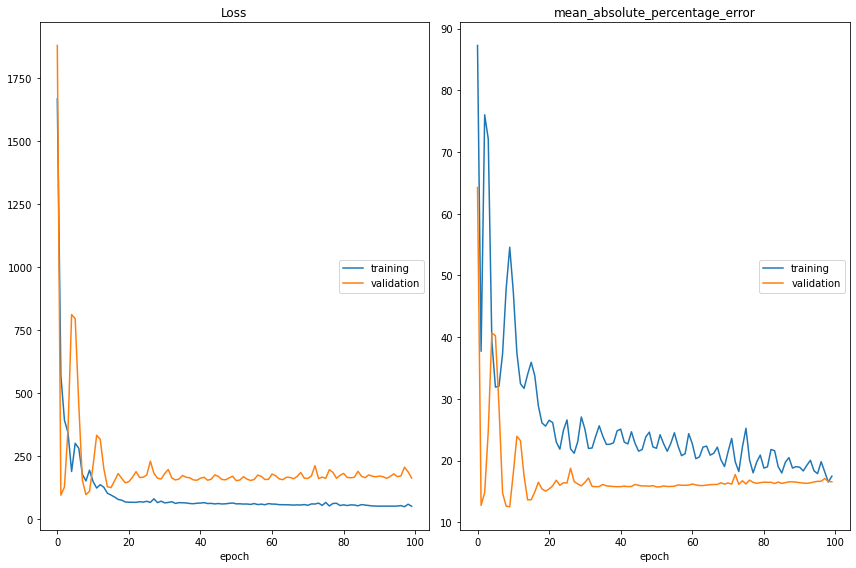

Loss
	training         	 (min:   49.802, max: 1668.227, cur:   51.821)
	validation       	 (min:   95.555, max: 1880.296, cur:  163.866)
mean_absolute_percentage_error
	training         	 (min:   16.514, max:   87.270, cur:   17.458)
	validation       	 (min:   12.506, max:   64.254, cur:   16.555)


In [46]:
history2 = model2.fit(x_train, y_train, epochs=100, batch_size=64,validation_split=0.2, callbacks=[PlotLossesCallback()])

# Testar o modelo 2

In [47]:
test_mat = tf.expand_dims(test_mat, axis=-1)
result = model.predict(test_mat)
print(result)

[[41.8731  ]
 [33.428112]
 [42.277668]
 [48.38454 ]
 [41.16132 ]
 [42.231873]
 [51.246704]
 [54.353195]
 [52.313324]
 [63.706802]
 [71.19703 ]
 [70.34459 ]
 [83.23983 ]
 [71.8804  ]
 [40.41436 ]
 [39.648045]
 [39.237434]
 [44.189274]
 [40.372765]
 [46.259766]
 [56.666885]
 [64.63696 ]
 [59.11435 ]
 [72.53457 ]
 [61.32609 ]
 [66.82139 ]
 [62.976482]
 [68.109215]]


In [48]:
result = pd.DataFrame(result,columns=['RMage'])
test_data['RMage']=result

In [49]:
resultados_finais = model2.predict(test_data.drop(['id'],axis=1))
print(resultados_finais)

[[23.215855]
 [18.81859 ]
 [28.9148  ]
 [27.110657]
 [23.625929]
 [26.33782 ]
 [45.526318]
 [55.80827 ]
 [43.11606 ]
 [64.670555]
 [56.704323]
 [68.36784 ]
 [89.18922 ]
 [72.93539 ]
 [26.273289]
 [21.245152]
 [24.609173]
 [26.988873]
 [24.628769]
 [25.701141]
 [56.59447 ]
 [67.57354 ]
 [59.416508]
 [80.95254 ]
 [64.119446]
 [68.23384 ]
 [64.92131 ]
 [69.70719 ]]


# Prepare submission

In [50]:
with open("submissao.csv", "w") as sub:
    # Writing data to a file
    sub.write('id,age\n')
    for i in test_data['id']:
        sub.write(str(i)+','+str(float(resultados_finais[i-1]))+'\n')
    